In [1]:
!pip3 install sklearn

In [2]:
!ls

0_CreateData_DaskTest.ipynb		    0_TextGenerator.ipynb
0_CreateData.ipynb			    data
0_CreateData_SparkExamples.ipynb	    README.md
0_CreateMarketingData.ipynb		    requirements.txt
0_CreateMarketingData_SDXDemo.ipynb	    snow
0_CreatePhoenixData_AnomalyDetection.ipynb  sonnets.txt
0_DeepTextGenerator.ipynb


### Marketing Campaign Info Dataset

In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [79]:
camp_conversion_df = pd.read_csv('data/campaign_conversion.csv')

In [80]:
rg = 1000

In [81]:
camp_conversion_df = camp_conversion_df.iloc[:rg]

In [82]:
mu, sigma = 1, .4 # mean and standard deviation
s = np.random.normal(mu, sigma, rg)

In [83]:
camp_conversion_df['score'] = camp_conversion_df['conversion']+s

In [84]:
camp_conversion_df['score'].sum()

1142.6839276315286

<AxesSubplot:>

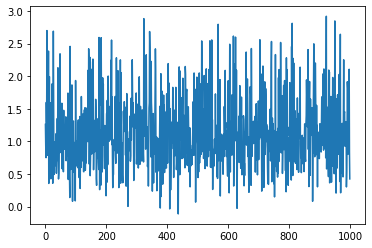

In [85]:
camp_conversion_df['score'].plot()

In [86]:
r = np.corrcoef(camp_conversion_df['score'], camp_conversion_df['conversion'])
#checking corr with new feature
r

array([[1.        , 0.68180297],
       [0.68180297, 1.        ]])

In [87]:
!pip3 install faker

In [88]:
from faker import Faker

In [89]:
fake = Faker('en_US')

In [90]:
final = {} 
final['name'] = [fake.name() for i in range(rg)]
final['street_address'] = [fake.street_address() for i in range(rg)]
final['city'] = [fake.city() for i in range(rg)]
final['postcode'] = [fake.postcode() for i in range(rg)]
final['phone_number'] = [fake.phone_number() for i in range(rg)]
final['job'] = [fake.job() for i in range(rg)]

In [91]:
personal_data = pd.DataFrame(final)

In [104]:
marketing_data = pd.concat([personal_data, camp_conversion_df], axis=1)

### Banking Info Dataset

In [93]:
import random
final = {}
rg = 500
final['name'] = marketing_data_df['name'].sample(n=rg, replace=False)
final['ABA_routing'] = [fake.aba() for i in range(rg)]
final['bank_country'] = [fake.bank_country() for i in range(rg)]
final['account_number'] = [fake.bban() for i in range(rg)]
final['IBAN'] = [fake.iban() for i in range(rg)]
final['swift11'] = [fake.swift11() for i in range(rg)]
final['random'] = [random.randint(0, 1) for i in range(rg)]

In [94]:
bank_data = pd.DataFrame(final)

In [95]:
bank_data.loc[bank_data['random'] == 1, 'name'] = fake.name()

In [96]:
bank_data = bank_data.drop('random', axis=1)

In [97]:
bank_data = bank_data.drop_duplicates(subset=['name'])

In [98]:
marketing_data_df.drop_duplicates(subset=['name']).shape

(991, 16)

In [99]:
pd.merge(bank_data, marketing_data_df, how="inner", on="name")

,name,ABA_routing,bank_country,account_number,IBAN,swift11,street_address,city,postcode,phone_number,...,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,score
0,Laura Griffin,073485500,GB,DZYZ32251559416671,GB22MMPP30416085268005,FNLQGB670KT,3434 Johnson Village Apt. 839,Boydside,32721,001-454-026-5035,...,12,177.66,1,0,Surburban,0,Phone,Buy One Get One,1,2.882442
1,Michelle Park,125967976,GB,KZIR56710546949317,GB67FYXG45604289308095,SXDOGBYSMR6,1267 Natalie Knolls,Port Christopher,39653,120.419.3478,...,8,29.99,0,1,Surburban,0,Phone,No Offer,1,2.598852
2,Amy Alvarez DDS,033987873,GB,FHQO47846894504696,GB09FDXY66401088392919,DBGVGBT5FBW,158 Carlos Knolls,Sarahfort,29194,(042)042-8098x23384,...,11,272.89,1,0,Surburban,1,Web,Buy One Get One,0,0.731633
3,Janice Miller,095253901,GB,QRQW81730559324890,GB85AUJW78964373913833,VBJJGBTEDEB,3037 Sanchez Island,Port Billyfort,10888,639-308-0990x359,...,11,85.29,0,1,Surburban,0,Phone,Discount,0,0.746837
4,Shawn Gutierrez,035708526,GB,MUXO76228240746337,GB15VNAB68645501420508,JZBWGB5Y8HP,610 David Flat Suite 462,South Aaron,13921,(551)885-5413x8862,...,2,95.33,0,1,Surburban,0,Web,No Offer,1,2.456564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Denise Patel,122341728,GB,WZPM69945056939879,GB06IMLL40360345967261,QMLZGBPSAC2,247 Jesse Valley,Michelleport,06719,(525)633-3640x399,...,10,29.99,1,0,Rural,1,Web,Buy One Get One,0,1.035209
262,Kyle Davis,064644981,GB,DKDR41935714933940,GB58MVIQ01134723533804,UNAZGBRVJ72,050 Johnson Trail Suite 929,Cherylfort,74183,(026)533-4477x73014,...,9,404.03,1,1,Urban,0,Multichannel,No Offer,0,1.162546
263,Sarah Parker,094808292,GB,JUNY66534439771515,GB51AOFK29961724960348,NCNAGBIU36K,787 Barron Union,Torresville,19237,(876)821-5358x01698,...,8,171.88,1,0,Surburban,0,Phone,No Offer,0,1.535459
264,Stephen Raymond,016276488,GB,UDMS27956043047893,GB28XEFO44557182633719,LVCAGB3H63L,332 Christina Summit,South Randy,39772,+1-752-124-7093x7752,...,4,29.99,0,1,Surburban,1,Web,Buy One Get One,0,0.830551


In [100]:
bank_data

,name,ABA_routing,bank_country,account_number,IBAN,swift11
323,Laura Griffin,073485500,GB,DZYZ32251559416671,GB22MMPP30416085268005,FNLQGB670KT
744,Joyce Parker,091263610,GB,IRTF26749717044041,GB29RZJY55814829055230,YUCFGBUOJTI
624,Michelle Park,125967976,GB,KZIR56710546949317,GB67FYXG45604289308095,SXDOGBYSMR6
584,Amy Alvarez DDS,033987873,GB,FHQO47846894504696,GB09FDXY66401088392919,DBGVGBT5FBW
806,Janice Miller,095253901,GB,QRQW81730559324890,GB85AUJW78964373913833,VBJJGBTEDEB
...,...,...,...,...,...,...
170,Denise Patel,122341728,GB,WZPM69945056939879,GB06IMLL40360345967261,QMLZGBPSAC2
536,Kyle Davis,064644981,GB,DKDR41935714933940,GB58MVIQ01134723533804,UNAZGBRVJ72
211,Sarah Parker,094808292,GB,JUNY66534439771515,GB51AOFK29961724960348,NCNAGBIU36K
462,Stephen Raymond,016276488,GB,UDMS27956043047893,GB28XEFO44557182633719,LVCAGB3H63L


### Credit Card Info Dataset

In [101]:
import random
final = {}
rg = 200
final['name'] = bank_data['name'].sample(n=rg, replace=False)
final['credit_card_number'] = [fake.credit_card_number() for i in range(rg)]
final['credit_card_provider'] = [fake.credit_card_provider() for i in range(rg)]
final['credit_card_security_code'] = [fake.credit_card_security_code() for i in range(rg)]
final['credit_card_expire'] = [fake.credit_card_expire() for i in range(rg)]

In [102]:
credit_card_data = pd.DataFrame(final)

In [103]:
pd.merge(bank_data, credit_card_data, how="inner", on="name")

,name,ABA_routing,bank_country,account_number,IBAN,swift11,credit_card_number,credit_card_provider,credit_card_security_code,credit_card_expire
0,Laura Griffin,073485500,GB,DZYZ32251559416671,GB22MMPP30416085268005,FNLQGB670KT,180002221205881,JCB 16 digit,090,01/26
1,Joyce Parker,091263610,GB,IRTF26749717044041,GB29RZJY55814829055230,YUCFGBUOJTI,180016203929292,VISA 19 digit,974,07/29
2,Michelle Park,125967976,GB,KZIR56710546949317,GB67FYXG45604289308095,SXDOGBYSMR6,4413208461093173,VISA 16 digit,863,11/24
3,Amy Alvarez DDS,033987873,GB,FHQO47846894504696,GB09FDXY66401088392919,DBGVGBT5FBW,4021754329935489,JCB 16 digit,695,01/27
4,Janice Miller,095253901,GB,QRQW81730559324890,GB85AUJW78964373913833,VBJJGBTEDEB,4147798099915261,JCB 16 digit,586,06/24
...,...,...,...,...,...,...,...,...,...,...
195,Timothy Ray PhD,042312947,GB,AYVS07809681312680,GB56RHLW87407284522303,ZHLLGBL6NO3,4446180680746405,JCB 16 digit,850,11/26
196,Jordan Jones,012313620,GB,IQDI85527637953603,GB59XFWB43137162044334,MGPKGBCAZ0L,4185515404637742,VISA 19 digit,283,03/31
197,Kyle Davis,064644981,GB,DKDR41935714933940,GB58MVIQ01134723533804,UNAZGBRVJ72,675929511128,Maestro,205,12/29
198,Stephen Raymond,016276488,GB,UDMS27956043047893,GB28XEFO44557182633719,LVCAGB3H63L,180045824172222,Diners Club / Carte Blanche,1900,03/30


Writing Datasets to local data folder

In [105]:
marketing_data.to_csv('data/mkt_campaign_data.csv', index=False)
bank_data.to_csv('data/bank_data.csv', index=False)
credit_card_data.to_csv('data/credit_card_data.csv', index=False)

Writing Datasets to Cloud Storage

In [106]:
import os
import time
import json
import requests
import xml.etree.ElementTree as ET
import datetime

#Extracting the correct URL from hive-site.xml
tree = ET.parse('/etc/hadoop/conf/hive-site.xml')
root = tree.getroot()

for prop in root.findall('property'):
    if prop.find('name').text == "hive.metastore.warehouse.dir":
        storage = prop.find('value').text.split("/")[0] + "//" + prop.find('value').text.split("/")[2]

print("The correct Cloud Storage 2 URL is:{}".format(storage))

os.environ['STORAGE'] = storage

#Now some sample CLI commands to create a test dir and upload a file from CML 
#You can run these within a notebook, editor file, or in the session prompt (bottom right) with an exclamation mark
#Or you can run these in the terminal (top right) without the exclamation mark

!hdfs dfs -mkdir -p $STORAGE/sdxdemodir
!hdfs dfs -copyFromLocal /home/cdsw/data/mkt_campaign_data.csv $STORAGE/sdxdemodir/mkt_campaign_data.csv
!hdfs dfs -copyFromLocal /home/cdsw/data/bank_data.csv $STORAGE/sdxdemodir/bank_data.csv
!hdfs dfs -copyFromLocal /home/cdsw/data/credit_card_data.csv $STORAGE/sdxdemodir/credit_card_data.csv
!hdfs dfs -ls $STORAGE/sdxdemodir

The correct ADLS 2 URL is:s3a://demo-aws-go02
22/04/18 18:09:56 WARN impl.MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
22/04/18 18:09:56 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
22/04/18 18:09:56 INFO impl.MetricsSystemImpl: s3a-file-system metrics system started
22/04/18 18:09:56 INFO s3a.IDBDelegationTokenBinding: Maybe renewing Knox Token when deploying unbonded token
22/04/18 18:09:56 INFO s3a.IDBDelegationTokenBinding: There is no Knox Token available, fetching one from IDBroker...
22/04/18 18:09:56 INFO idbroker.AbstractIDBClient: Authenticating with IDBroker requires Kerberos
22/04/18 18:09:56 INFO idbroker.AbstractIDBClient: Kerberos credentials are available, using Kerberos to establish a session. UGI=pauldefusco/d3d61668-a532-4588-8b44-84205b7df77f.mlx.cloudera.site@GO02-DEM.YLCU-ATMI.CLOUDERA.SITE (auth:KERBEROS)
Apr 18, 2022 6:09:56 PM org.apache.knox.gateway.she

Creating time series data

In [ ]:
!pip3 install TimeSynth

     |████████████████████████████████| 11.2MB 12.3MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 59.8MB/s eta 0:00:01
     |████████████████████████████████| 143kB 74.9MB/s eta 0:00:01
     |████████████████████████████████| 522kB 62.9MB/s eta 0:00:01
  Created wheel for jitcxde-common: filename=jitcxde_common-1.4.1-cp36-none-any.whl size=14933 sha256=f60d28eb72065b493a983b58eb49f819bdff8720cb210a9e5108548c800b705b
  Stored in directory: /home/cdsw/.cache/pip/wheels/10/cd/50/f17ec174e477f7be77d38256b1ef5ca4e1da53dcdb85732817
  Created wheel for jitcdde: filename=jitcdde-1.4.0-cp36-none-any.whl size=30647 sha256=3488bc0c50288f22acc4e4ba639c291f73548d6e051e6b24637811f98e377097
  Stored in directory: /home/cdsw/.cache/pip/wheels/2c/14/0b/e7afe0b0f1dfd5327ad49307b98670c38a7df3bc4872d69178
  Created wheel for mpmath: filename=mpmath-1.1.0-cp36-none-any.whl size=532240 sha256=701d2a6ae1339c22387262e66310b400b165e2729a0149262b61967210c6a2c0
  Stored in directory: /home/cdsw/.

In [ ]:
import timesynth as ts

In [ ]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=100)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)

In [ ]:
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.3)

In [ ]:
# Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=.3)

In [ ]:
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)

In [ ]:
# Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(irregular_time_samples)

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples, samples+50, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise');

In [ ]:
# Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)

In [ ]:
# Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [ ]:
# Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample(irregular_time_samples)

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

In [ ]:
plt.plot(irregular_time_samples, errors_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Red noise');

In [ ]:

# Initializing TimeSampler
time_sampler_pp = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples_pp = time_sampler_pp.sample_irregular_time(resolution=0.05, keep_percentage=50)

In [ ]:

# Initializing Pseudoperiodic signal
pseudo_periodic = ts.signals.PseudoPeriodic(frequency=2, freqSD=0.01, ampSD=0.5)

In [ ]:
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_pp = ts.TimeSeries(pseudo_periodic)

In [ ]:

# Sampling using the irregular time samples
samples_pp, signals_pp, errors_pp = timeseries_pp.sample(irregular_time_samples_pp)

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples_pp, samples_pp, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Pseudoperiodic signal');

In [ ]:
gp = ts.signals.GaussianProcess(kernel='Matern', nu=3./2)
gp_series = ts.TimeSeries(signal_generator=gp)
samples = gp_series.sample(irregular_time_samples)[0]

In [ ]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process signal with Matern 3/2-kernel');

In [ ]:
car = ts.signals.CAR(ar_param=.99, sigma=5)
car_series = ts.TimeSeries(signal_generator=car)
samples = car_series.sample(irregular_time_samples)

In [ ]:
plt.plot(irregular_time_samples, (samples[0]+35)*15, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Example Continuous Autoregressive process');

In [ ]:
import random

In [ ]:
def create_cont_autoreg_process(n):
    
    dat = []
    
    sigma = 20
    ar_param = .2
    car = ts.signals.CAR(ar_param=ar_param, sigma=sigma)
    car_series = ts.TimeSeries(signal_generator=car)
    samples = car_series.sample(irregular_time_samples)
    
    dat.append((samples[0] + ar_param +5) * sigma)
    
    sigma = 4
    ar_param = .2
    car = ts.signals.CAR(ar_param=ar_param, sigma=sigma)
    car_series = ts.TimeSeries(signal_generator=car)
    samples = car_series.sample(irregular_time_samples)    
    
    dat.append((samples[0] + ar_param +5) * sigma)
    
    for i in range(n):
        sigma = random.randint(1,35)
        ar_param = random.randint(1,10)
        car = ts.signals.CAR(ar_param=ar_param/10, sigma=sigma)
        car_series = ts.TimeSeries(signal_generator=car)
        samples = car_series.sample(irregular_time_samples)
        
        dat.append((samples[0] + ar_param +5) * sigma)
        
    return dat

In [ ]:
ex = create_cont_autoreg_process(50)

In [ ]:
for i in ex:
    i[i<0] = 0

In [ ]:
spend_df = pd.DataFrame(ex)

In [ ]:
spend_df.to_csv('data/spend_new.csv', index=False)